In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import scipy.stats as stats

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
pd.set_option('display.max_columns', None)
ht = pd.read_csv("The Global Dataset 14 Apr 2020.csv", na_values='-99',low_memory=False)
df = ht.drop(['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use'], axis=1)
df = pd.DataFrame(df)
df.head()

yearOfRegistration       Datasource  gender ageBroad majorityStatus  \
0                2002  Case Management  Female   18--20          Adult   
1                2002  Case Management  Female   18--20          Adult   
2                2002  Case Management  Female   18--20          Adult   
3                2002  Case Management  Female   18--20          Adult   
4                2002  Case Management  Female   18--20          Adult   

  majorityStatusAtExploit majorityEntry citizenship  \
0                     NaN           NaN          CO   
1                     NaN           NaN          CO   
2                     NaN           NaN          CO   
3                     NaN           NaN          CO   
4                     NaN           NaN          CO   

   meansOfControlDebtBondage  meansOfControlTakesEarnings  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   meansOfControlRestrictsFinancialAccess  meansOfControlThreats  \
0                                     NaN                    NaN   
1                                     NaN                    NaN   
2                                     NaN                    NaN   
3                                     NaN                    NaN   
4                                     NaN                    NaN   

   meansOfControlPsychologicalAbuse  meansOfControlPhysicalAbuse  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   

   meansOfControlSexualAbuse  meansOfControlFalsePromises  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   meansOfControlPsychoactiveSubstances  meansOfControlRestrictsMovement  \
0                                   NaN                              NaN   
1                                   NaN                              NaN   
2                                   NaN                              NaN   
3                                   NaN                              NaN   
4                                   NaN                              NaN   

   meansOfControlRestrictsMedicalCare  meansOfControlExcessiveWorkingHours  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                                 NaN                                  NaN   
4                                 NaN                                  NaN   

   meansOfControlUsesChildren  meansOfControlThreatOfLawEnforcement  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

   meansOfControlWithholdsNecessities  meansOfControlWithholdsDocuments  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                     

In [3]:
print(df.shape)
df.columns

(48801, 63)


Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   yearOfRegistration                      48801 non-null  int64  
 1   Datasource                              48801 non-null  object 
 2   gender                                  48801 non-null  object 
 3   ageBroad                                36439 non-null  object 
 4   majorityStatus                          36439 non-null  object 
 5   majorityStatusAtExploit                 9290 non-null   object 
 6   majorityEntry                           6491 non-null   object 
 7   citizenship                             48523 non-null  object 
 8   meansOfControlDebtBondage               2496 non-null   float64
 9   meansOfControlTakesEarnings             3997 non-null   float64
 10  meansOfControlRestrictsFinancialAccess  253 non-null    fl

In [5]:
# I received this code for 'pycountry_convert' from Kaggle user Viktor Polevoi, url: https://www.kaggle.com/viktorpolevoi/global-human-trafficking-eda

def get_alpha3(col):
    try: iso_3 =  country_name_to_country_alpha3(col)
    except: iso_3 = 'Unknown'
    return iso_3

def get_name(col):
    try: name =  country_alpha2_to_country_name(col)
    except: name = 'Unknown'
    return name

In [84]:
#correct
df['country'] = df['citizenship'].apply(lambda x: get_name(x))
df['exploitCountry'] = df['CountryOfExploitation'].apply(lambda x: get_name(x))
df['alpha_3'] = df['country'].apply(lambda x: get_alpha3(x))
df['exploitAlpha_3'] = df['exploitCountry'].apply(lambda x: get_alpha3(x))
df_map = pd.DataFrame(df.groupby(['country', 'alpha_3'])['alpha_3'].agg(victims='count')).reset_index()
df_map_exploit = pd.DataFrame(df.groupby(['exploitCountry', 'exploitAlpha_3'])['exploitAlpha_3'].agg(Victims='count')).reset_index()

In [86]:
#correct
fig = px.choropleth(df_map,locations="alpha_3",
                    color="victims",
                    hover_name="country",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="Human Trafficking Total by Citizenship (2002-2019)")
fig.show()

In [87]:
#correct
fig = px.choropleth(df_map_exploit,locations="exploitAlpha_3",
                    color="Victims",
                    hover_name="exploitCountry",
                    color_continuous_scale='Viridis_r')
fig.update_layout(title_text="Human Trafficking Total by Country Exploit (2002-2019)")
fig.show()

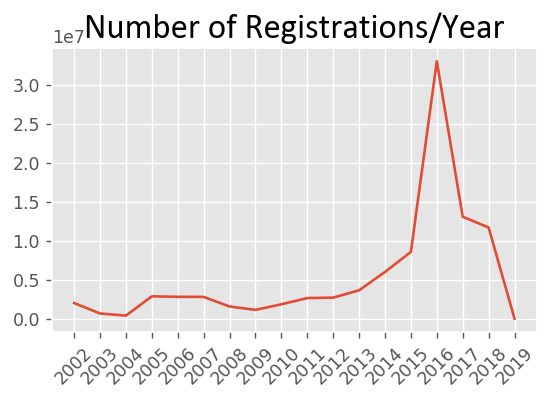

In [108]:
#correct
plt.figure(figsize=(5,3), dpi=125)
plt.style.use('ggplot')
df.groupby('yearOfRegistration')['yearOfRegistration'].sum().plot()
plt.title('Number of Registrations/Year',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(df.yearOfRegistration.unique(), rotation=45)
plt.xlabel('')
plt.show()

In [10]:
#correct
piv = pd.pivot_table(df, values='Datasource', index='country',columns='yearOfRegistration', aggfunc='count', fill_value=0)
piv.style.background_gradient(cmap='GnBu')

In [11]:
#correct
df['ageBroad'] = pd.Categorical(df['ageBroad'],categories=['0--8', '9--17', '18--20', '21--23','24--26', '27--29', '30--38', '39--47','48+'], ordered=True)

Female percent: 73%, Males, 27%


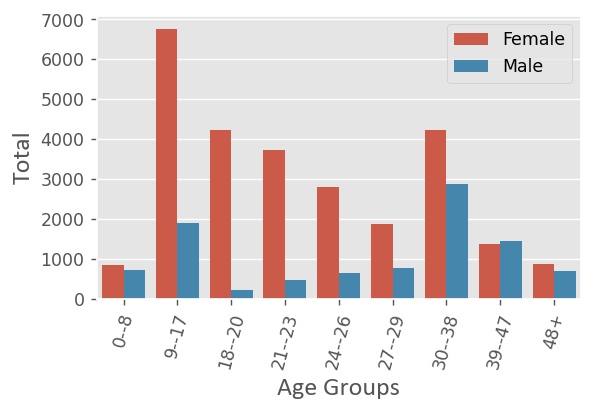

In [12]:
#corret
total = df['gender'].count()
sex = df['gender'].value_counts()
percentF = round((sex[0]/total)*100)
percentM = round((sex[1]/total)*100)
print(f"Female percent: {percentF}%, Males, {percentM}%")
plt.figure(figsize=(5,3), dpi=125)
plt.style.use('ggplot')
df_age = df[['ageBroad','gender']]
sns.countplot(data=df_age,x='ageBroad',hue='gender')
plt.xlabel('Age Groups', fontdict={'fontname':'Calibri','fontsize':15})
plt.ylabel('Total', fontdict={'fontname':'Calibri','fontsize':15})
plt.xticks(rotation=75)
plt.legend()
plt.show()

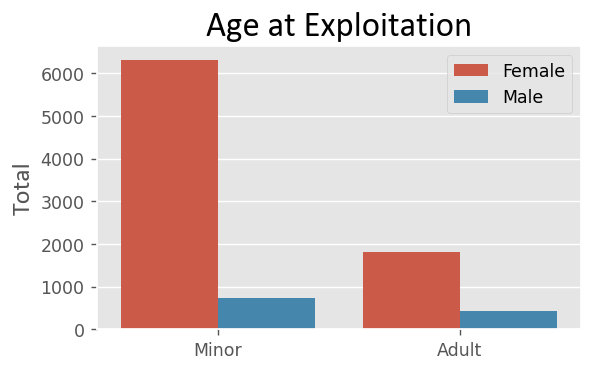

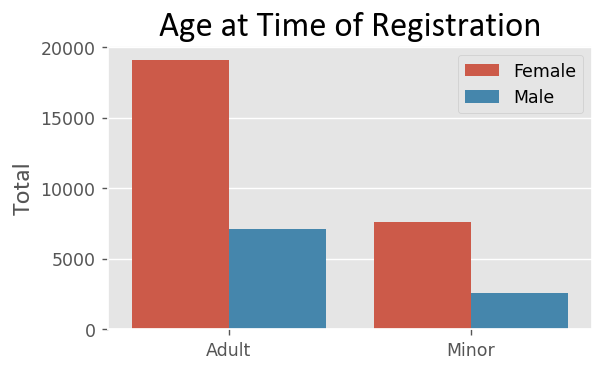

In [55]:
# correct
plt.figure(figsize=(5,3), dpi=125)
plt.style.use('ggplot')
df_age = df[['majorityStatusAtExploit','gender']]
sns.countplot(data=df_age,x='majorityStatusAtExploit',hue='gender')
plt.title('Age at Exploitation',fontdict={'fontname':'Calibri','fontsize':20})
plt.xlabel('')
plt.ylabel('Total', fontdict={'fontname':'Calibri','fontsize':15})
plt.legend()
plt.show()
#---------------
plt.figure(figsize=(5,3), dpi=125)
plt.style.use('ggplot')
df_age = df[['majorityStatus','gender']]
sns.countplot(data=df_age,x='majorityStatus',hue='gender')
plt.title('Age at Time of Registration',fontdict={'fontname':'Calibri','fontsize':20})
plt.xlabel('')
plt.ylabel('Total', fontdict={'fontname':'Calibri','fontsize':15})
plt.legend()
plt.show()

In [50]:
# Not sure if this is the correct way to break down the meansOfControlConcatenated column, 
# possibly doing a one hot encoding, but then I get somewhat lost on how to get all the columns into one chart

df['meansOfControlConcatenated'] = df['meansOfControlConcatenated'].str.replace('Abuse', 'abuse', regex=True)
df_control = df[(df.meansOfControlConcatenated.notna()) & (df.gender)]\
        .meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis=0)

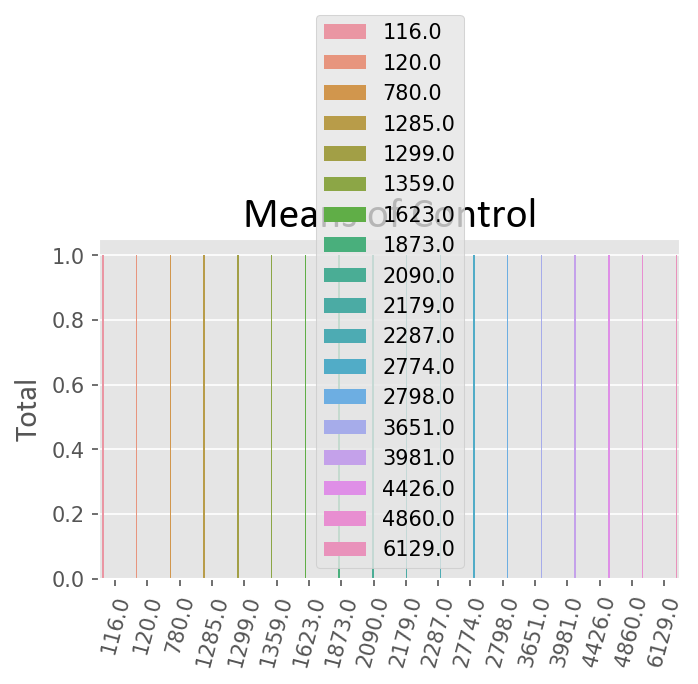

In [51]:
# Having issue graphing the following column by 'gender': meansOfControlConcatenated

plt.figure(figsize=(5,3), dpi=150)
plt.style.use('ggplot')
sns.countplot(data=df_control, x=df_control.index, hue=df_control)
plt.title('Means of Control',fontdict={'fontname':'Calibri','fontsize':20})
plt.ylabel('Total', fontdict={'fontname':'Calibri','fontsize':15})
plt.xticks(rotation=75)
plt.show()

In [56]:
# alternative solution that does not appear to work

df['meansOfControlConcatenated'] = df['meansOfControlConcatenated'].str.replace('Abuse', 'abuse', regex=True)
df_control_f = df[(df.meansOfControlConcatenated.notna()) & (df.gender == 'Female')]\
        .meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
df_control_m = df[(df.meansOfControlConcatenated.notna()) & (df.gender == 'Male')]\
        .meansOfControlConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

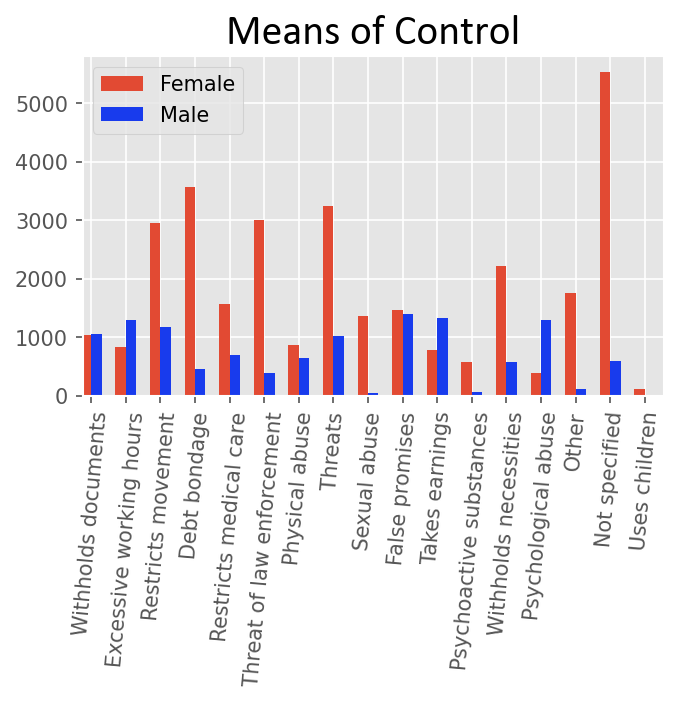

In [64]:
# appears to be graphed incorrectly

fig = plt.figure(figsize=(5,3), dpi=150) 
plt.style.use('ggplot')
ax = fig.add_subplot()
width = .3
df_control_f.plot(kind='bar', ax=ax, width=width, position=1, label='Female')
df_control_m.plot(kind='bar', color='#183bed', ax=ax, width=width, position=0, label='Male')
plt.title('Means of Control',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [62]:
# same issue for column: typeOfExploitConcatenated
df_exploit_f = df[(df.typeOfExploitConcatenated.notna()) & (df.gender == 'Female')]\
        .typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
df_exploit_m = df[(df.typeOfExploitConcatenated.notna()) & (df.gender == 'Male')]\
        .typeOfExploitConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

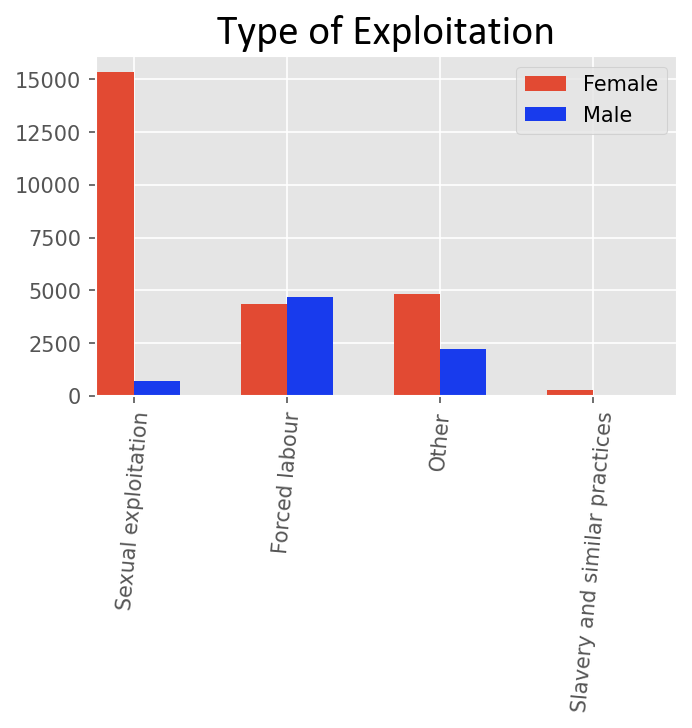

In [65]:
# graphed incorrectly

fig = plt.figure(figsize=(5,3), dpi=150) 
plt.style.use('ggplot')
ax = fig.add_subplot()
width = .3
df_exploit_f.plot(kind='bar', ax=ax, width=width, position=1, label='Female')
df_exploit_m.plot(kind='bar', color='#183bed', ax=ax, width=width, position=0, label='Male')
plt.title('Type of Exploitation',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [69]:
# same issue for column: typeOfLabourConcatenated
df_labour_f = df[(df.typeOfLabourConcatenated.notna()) & (df.gender == 'Female')]\
        .typeOfLabourConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
df_labour_m = df[(df.typeOfLabourConcatenated.notna()) & (df.gender == 'Male')]\
        .typeOfLabourConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0) 

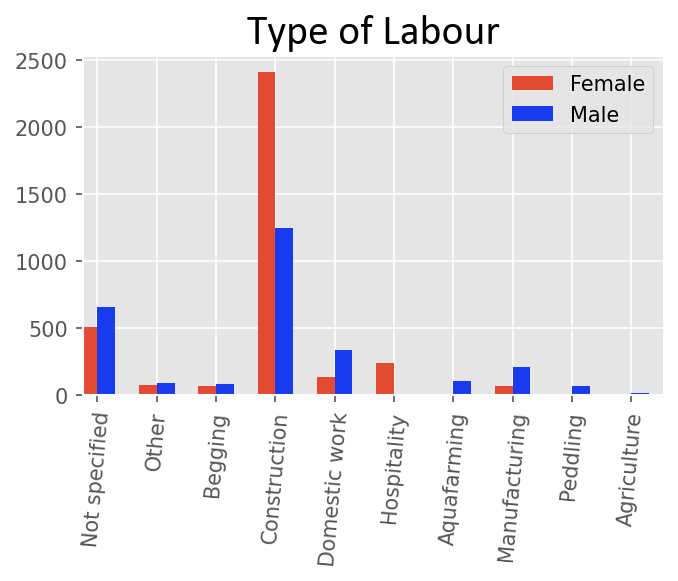

In [73]:
# graphed incorrectly
fig = plt.figure(figsize=(5,3), dpi=150) 
plt.style.use('ggplot')
ax = fig.add_subplot()
width = .3
df_labour_f.plot(kind='bar', ax=ax, width=width, position=1, label='Female')
df_labour_m.plot(kind='bar', color='#183bed', ax=ax, width=width, position=0, label='Male')
plt.title('Type of Labour',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [71]:
# same issue for column: typeOfSexConcatenated
df_sex_f = df[(df.typeOfSexConcatenated.notna()) & (df.gender == 'Female')]\
        .typeOfSexConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
df_sex_m = df[(df.typeOfSexConcatenated.notna()) & (df.gender == 'Male')]\
        .typeOfSexConcatenated.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

### This next cell shows that the graph below it is incorrect

In [136]:
df_sex_f.head() # this shows that the below graph is incorrect

Prostitution               4356.0
Pornography                 133.0
Private sexual services      43.0
dtype: float64

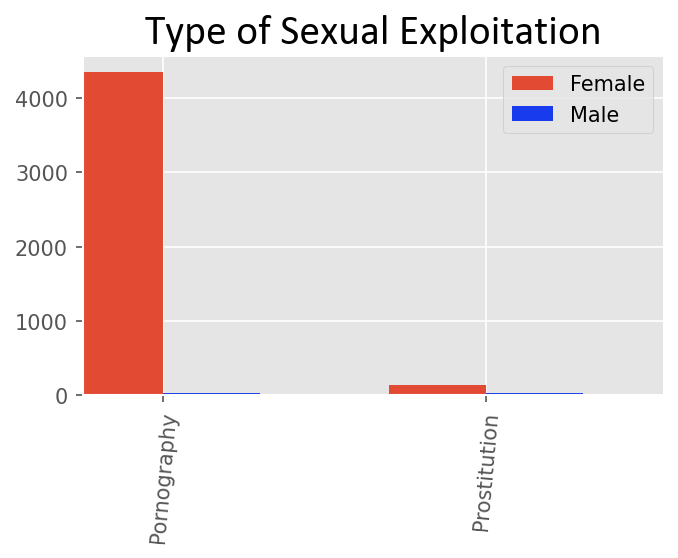

In [131]:
# graphed incorrectly
fig = plt.figure(figsize=(5,3), dpi=150) 
plt.style.use('ggplot')
ax = fig.add_subplot()
width = .3
df_sex_f.plot(kind='bar', ax=ax, width=width, position=1, label='Female')
df_sex_m.plot(kind='bar', color='#183bed', ax=ax, width=width, position=0, label='Male')
plt.title('Type of Sexual Exploitation',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [130]:
# and so on and so forth
df_relationship_f = df[(df.RecruiterRelationship.notna()) & (df.gender == 'Female')]\
        .RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)
df_relationship_m = df[(df.RecruiterRelationship.notna()) & (df.gender == 'Male')]\
        .RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split("; "))).sum(axis = 0)

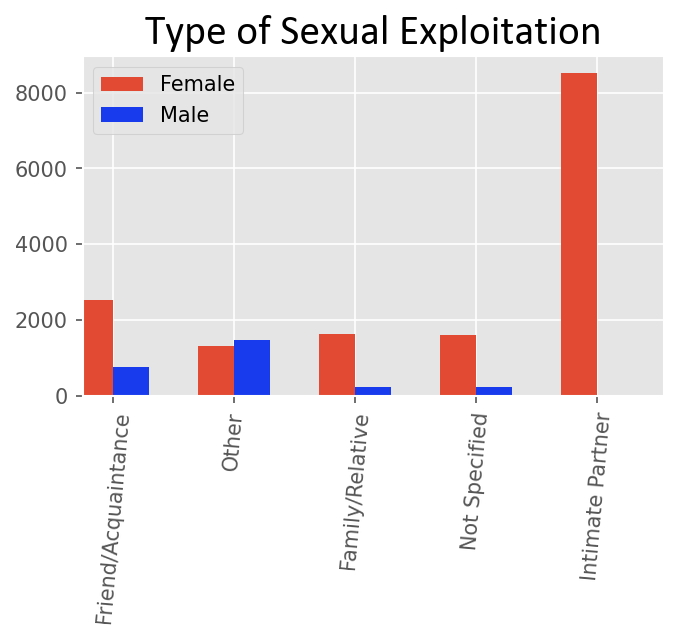

In [135]:
fig = plt.figure(figsize=(5,3), dpi=150) 
plt.style.use('ggplot')
ax = fig.add_subplot()
width = .3
df_relationship_f.plot(kind='bar', ax=ax, width=width, position=1, label='Female')
df_relationship_m.plot(kind='bar', color='#183bed', ax=ax, width=width, position=0, label='Male')
plt.title('Type of Sexual Exploitation',fontdict={'fontname':'Calibri','fontsize':20})
plt.xticks(rotation=85)
plt.legend()
plt.show()